This notebook is the first attempt at dealing with the problem of automatic item classification at Caspeco AB as a clustering problem, using sentence embeddings from SBERT. The clustering will be performed on both unprocessed and pre-processed data. We have already calculated and saved the embeddings for the given data, both unprocessed and processed, using three different pre-trained multilingual models. 

According to the SBERT documentation, the sentence embeddings performance of these models is the following: 

1.   'distiluse-base-multilingual-cased-v2' = 60.18, 
2.   'paraphrase-multilingual-MiniLM-L12-v2' = 64.25,
3.   'paraphrase-multilingual-mpnet-base-v2' = 65.83.

 
We will perform K-means clustering on all embeddings and evaluate it on 6 sets of data (processed and unprocessed data for all three models). Since it might be hard to evaluate the quality of the clustering from a purely visual inspection we would also like to perform a quantitative analysis of the clustering performance. We will use the following three metrics: the Silhouette Score, the Calinski-Harabasz Index and the Davies-Bouldin Index.

In [1]:
import pandas as pd

# Load the embeddings
df_orig_1_emb_distiluse = pd.read_csv('/content/orig_1_emb_distiluse.csv')
df_orig_1_emb_para_mini = pd.read_csv('/content/orig_1_emb_para_mini.csv')
df_orig_1_emb_para_base = pd.read_csv('/content/orig_1_emb_para_base.csv')

df_proc_1_emb_distiluse = pd.read_csv('/content/proc_1_emb_distiluse.csv')
df_proc_1_emb_para_mini = pd.read_csv('/content/proc_1_emb_para_mini.csv')
df_proc_1_emb_para_base = pd.read_csv('/content/proc_1_emb_para_base.csv')

In [21]:
from sklearn.cluster import KMeans
from sklearn import metrics

"""
A function for K-means clustering and evaluating the quality of the clusters using 
the Silhouette Score, the Calinski-Harabasz Index and the Davies-Bouldin Index.

Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'.
"""

def kmeans_clustering(min_clusters, max_clusters, embeddings):
  
  # Array with different numbers of clusters
  num_clusters = [x for x in range (min_clusters,max_clusters)]

  # The arrays to hold the scores
  silhouette_scores = []
  calinski_harabasz_scores = []
  davies_bouldin_scores = []

  # The 2-d array to hold the arrays of cluster assignment
  cluster_assignments = []

  # Clustering for different numbers of clusters
  for number in num_clusters:
    clustering_model = KMeans(n_clusters=number)
    clustering_model.fit(embeddings)
    cluster_assignment = clustering_model.labels_
    cluster_assignments.append(cluster_assignment)
    
    # Compute the Silhouette Score
    sil_score = metrics.silhouette_score(embeddings, cluster_assignment, metric='cosine')
    silhouette_scores.append(sil_score)

    # Compute the Calinski-Harabasz Index
    calinski_harabasz_idx = metrics.calinski_harabasz_score(embeddings, cluster_assignment)
    calinski_harabasz_scores.append(calinski_harabasz_idx)

    # Compute the Davies-Bouldin Index
    davies_bouldin_idx = metrics.davies_bouldin_score(embeddings, cluster_assignment)
    davies_bouldin_scores.append(davies_bouldin_idx)

  return (silhouette_scores, calinski_harabasz_scores, davies_bouldin_scores, cluster_assignments)

Now we can go and do the K-means clustering. Since we don't know the optimal number of clusters to use we will run the algorithm several times, incrementing the number of clusters each time. We will save the cluster assignments to a dataframe. 

K-means clustering can be applied to the embeddings despite the fact that they are high-dimensional vectors (K-means clustering does not work well in higher dimensions due to the curse of dimensionality). But according to the creator of SBERT, when using cosine similarity to train the model, K-means clustering works fine (see [HERE](https://www.youtube.com/watch?v=RHXZKUr8qOY)).

In [22]:
import numpy as np
"""
Prepare the dataframes, read them into lists and process them appropriately.
"""
# Copy the dataframes
df_orig_1_distiluse_kmeans = df_orig_1_emb_distiluse.copy()
df_orig_1_para_mini_kmeans = df_orig_1_emb_para_mini.copy()
df_orig_1_para_base_kmeans = df_orig_1_emb_para_base.copy()

df_proc_1_distiluse_kmeans = df_proc_1_emb_distiluse.copy()
df_proc_1_para_mini_kmeans = df_proc_1_emb_para_mini.copy()
df_proc_1_para_base_kmeans = df_proc_1_emb_para_base.copy()

# distiluse-base-multilingual-cased-v2 model
# Read the dataframes into lists
orig_embeddings_distiluse_arr = df_orig_1_distiluse_kmeans.values.tolist()
proc_embeddings_distiluse_arr = df_proc_1_distiluse_kmeans.values.tolist()

# Remove the item names from the lists
for item in orig_embeddings_distiluse_arr:
  del item[0]

for item in proc_embeddings_distiluse_arr:
  del item[0]

# paraphrase-multilingual-MiniLM-L12-v2 model
# Read the dataframes into lists
orig_embeddings_para_mini_arr = df_orig_1_para_mini_kmeans.values.tolist()
proc_embeddings_para_mini_arr = df_proc_1_para_mini_kmeans.values.tolist()

# Remove the item names from the lists
for item in orig_embeddings_para_mini_arr:
  del item[0]

for item in proc_embeddings_para_mini_arr:
  del item[0]

# paraphrase-multilingual-mpnet-base-v2 model
# Read the dataframes into lists
orig_embeddings_para_base_arr = df_orig_1_para_base_kmeans.values.tolist()
proc_embeddings_para_base_arr = df_proc_1_para_base_kmeans.values.tolist()

# Remove the item names from the lists
for item in orig_embeddings_para_base_arr:
  del item[0]

for item in proc_embeddings_para_base_arr:
  del item[0]

# Normalize the embeddings to unit length
orig_embeddings_distiluse_arr = orig_embeddings_distiluse_arr / np.linalg.norm(orig_embeddings_distiluse_arr, axis=1, keepdims=True)
proc_embeddings_distiluse_arr = proc_embeddings_distiluse_arr / np.linalg.norm(proc_embeddings_distiluse_arr, axis=1, keepdims=True)

orig_embeddings_para_mini_arr = orig_embeddings_para_mini_arr / np.linalg.norm(orig_embeddings_para_mini_arr, axis=1, keepdims=True)
proc_embeddings_para_mini_arr = proc_embeddings_para_mini_arr / np.linalg.norm(proc_embeddings_para_mini_arr, axis=1, keepdims=True)

orig_embeddings_para_base_arr = orig_embeddings_para_base_arr / np.linalg.norm(orig_embeddings_para_base_arr, axis=1, keepdims=True)
proc_embeddings_para_base_arr = proc_embeddings_para_base_arr / np.linalg.norm(proc_embeddings_para_base_arr, axis=1, keepdims=True)



In [23]:
"""
K-means clustering for the different models. 
"""

# Define the parameters
min_clusters = 5
max_clusters = 15

# distiluse-base-multilingual-cased-v2 model
# Perform K-means on both datasets
(orig_distil_silh_scores, orig_distil_calin_scores, orig_distil_davies_scores, 
 orig_distil_cluster_ass) = kmeans_clustering(min_clusters, max_clusters, orig_embeddings_distiluse_arr)

(proc_distil_silh_scores, proc_distil_calin_scores, proc_distil_davies_scores, 
 proc_distil_cluster_ass) = kmeans_clustering(min_clusters, max_clusters, proc_embeddings_distiluse_arr)

# paraphrase-multilingual-MiniLM-L12-v2 model
# Perform K-means on both datasets
(orig_para_mini_silh_scores, orig_para_mini_calin_scores, orig_para_mini_davies_scores, 
 orig_para_mini_cluster_ass) = kmeans_clustering(min_clusters, max_clusters, orig_embeddings_para_mini_arr)

(proc_para_mini_silh_scores, proc_para_mini_calin_scores, proc_para_mini_davies_scores, 
 proc_para_mini_cluster_ass) = kmeans_clustering(min_clusters, max_clusters, proc_embeddings_para_mini_arr)

# paraphrase-multilingual-mpnet-base-v2
(orig_para_base_silh_scores, orig_para_base_calin_scores, orig_para_base_davies_scores, 
 orig_para_base_cluster_ass) = kmeans_clustering(min_clusters, max_clusters, orig_embeddings_para_base_arr)

(proc_para_base_silh_scores, proc_para_base_calin_scores, proc_para_base_davies_scores, 
 proc_para_base_cluster_ass) = kmeans_clustering(min_clusters, max_clusters, proc_embeddings_para_base_arr)

In [ ]:
# Print the clusters

items_orig = df_orig_1_emb_distiluse['item_orig'].values.tolist()
items_proc = df_proc_1_emb_distiluse['item_proc'].values.tolist()

idx = 0

print("Silhouette scores = ", proc_para_base_silh_scores)
print("Calinski-Hab scores = ", proc_para_base_calin_scores)
print("Davies-Boul scores = ", proc_para_base_davies_scores)

for i in range(min_clusters, max_clusters):
  print("Clusters for nr. of clusters = ", i)
  cluster_ass = proc_para_base_cluster_ass[idx]
  
  clustered_items = {}
  for sentence_id, cluster_id in enumerate(cluster_ass):
      if cluster_id not in clustered_items:
          clustered_items[cluster_id] = []
      clustered_items[cluster_id].append(items_proc[sentence_id])

  for i, cluster in clustered_items.items():
      print("Cluster ", i+1)
      print(cluster)
      print("")
  
  idx += 1

In [30]:
"""
Save the clustering assignments into the appropriate dataframes. 
"""
# Variables to be used later
idx_distil = 0
idx_para_mini = 0
idx_para_base = 0

# distiluse-base-multilingual-cased-v2 model
# Add cluster assignments to dataframes
for i in range(min_clusters, max_clusters):
  df_orig_1_distiluse_kmeans['distil-k-means-' + str(i)] = orig_distil_cluster_ass[idx_distil]
  idx_distil += 1

idx_distil = 0

for i in range(min_clusters, max_clusters):
  df_proc_1_distiluse_kmeans['distil-k-means-' + str(i)] = proc_distil_cluster_ass[idx_distil]
  idx_distil += 1

# paraphrase-multilingual-MiniLM-L12-v2 model
# Add cluster assignments to dataframes
for i in range(min_clusters, max_clusters):
  df_orig_1_para_mini_kmeans['para-mini-k-means-' + str(i)] = orig_para_mini_cluster_ass[idx_para_mini]
  idx_para_mini += 1

idx_para_mini = 0

for i in range(min_clusters, max_clusters):
  df_proc_1_para_mini_kmeans['para-mini-k-means-' + str(i)] = proc_para_mini_cluster_ass[idx_para_mini]
  idx_para_mini += 1

# paraphrase-multilingual-mpnet-base-v2
# Add cluster assignments to dataframes
for i in range(min_clusters, max_clusters):
  df_orig_1_para_base_kmeans['para-base-k-means-' + str(i)] = orig_para_base_cluster_ass[idx_para_base]
  idx_para_base += 1

idx_para_base = 0

for i in range(min_clusters, max_clusters):
  df_proc_1_para_base_kmeans['para-base-k-means-' + str(i)] = proc_para_base_cluster_ass[idx_para_base]
  idx_para_base += 1

In [31]:
"""
Save the resulting dataframes to csv files. 
"""
df_orig_1_distiluse_kmeans.to_csv('df-orig-1-distiluse-kmeans.csv', index=False)
df_orig_1_para_mini_kmeans.to_csv('df-orig-1-para-mini-kmeans.csv', index=False)
df_orig_1_para_base_kmeans.to_csv('df-orig-1-para-base-kmeans.csv', index=False)

df_proc_1_distiluse_kmeans.to_csv('df-proc-1-distiluse-kmeans.csv', index=False)
df_proc_1_para_mini_kmeans.to_csv('df-proc-1-para-mini-kmeans.csv', index=False)
df_proc_1_para_base_kmeans.to_csv('df-proc-1-para-base-kmeans.csv', index=False)


In [32]:
"""
Write the clustering results for df_orig_1_distiluse_kmeans to a txt file. 
"""

with open('orig-1-distiluse-kmeans-clusters.txt', 'w') as f:
  
  # Write the clusters 
  for i in range(min_clusters, max_clusters):
    f.write("Clusters for nr. of clusters = ")
    f.write(str(i))
    f.write('\n')

    for j in range(i):
      f.write("Cluster ")
      f.write(str(j))
      f.write('\n')
      cluster = df_orig_1_distiluse_kmeans[df_orig_1_distiluse_kmeans['distil-k-means-' + str(i)] == j]['item_orig']
      f.write(str(cluster))
      f.write('\n')

  # Write the scores
  f.write("Silhouette scores = ")
  f.write(str(orig_distil_silh_scores))
  f.write("\n")

  f.write("Calinski-Harabasz scores = ")
  f.write(str(orig_distil_calin_scores))
  f.write("\n")

  f.write("Davies-Bouldin scores = ")
  f.write(str(orig_distil_davies_scores))
  f.write("\n")

In [33]:
"""
Write the clustering results for df_orig_1_para_mini_kmeans to a txt file. 
"""

with open('orig-1-para-mini-kmeans-clusters.txt', 'w') as f:
  
  # Write the clusters 
  for i in range(min_clusters, max_clusters):
    f.write("Clusters for nr. of clusters = ")
    f.write(str(i))
    f.write('\n')

    for j in range(i):
      f.write("Cluster ")
      f.write(str(j))
      f.write('\n')
      cluster = df_orig_1_para_mini_kmeans[df_orig_1_para_mini_kmeans['para-mini-k-means-' + str(i)] == j]['item_orig']
      f.write(str(cluster))
      f.write('\n')

  # Write the scores
  f.write("Silhouette scores = ")
  f.write(str(orig_para_mini_silh_scores))
  f.write("\n")

  f.write("Calinski-Harabasz scores = ")
  f.write(str(orig_para_mini_calin_scores))
  f.write("\n")

  f.write("Davies-Bouldin scores = ")
  f.write(str(orig_para_mini_davies_scores))
  f.write("\n")

In [34]:
"""
Write the clustering results for df_orig_1_para_base_kmeans to a txt file. 
"""

with open('orig-1-para-base-kmeans-clusters.txt', 'w') as f:
  
  # Write the clusters 
  for i in range(min_clusters, max_clusters):
    f.write("Clusters for nr. of clusters = ")
    f.write(str(i))
    f.write('\n')

    for j in range(i):
      f.write("Cluster ")
      f.write(str(j))
      f.write('\n')
      cluster = df_orig_1_para_base_kmeans[df_orig_1_para_base_kmeans['para-base-k-means-' + str(i)] == j]['item_orig']
      f.write(str(cluster))
      f.write('\n')

  # Write the scores
  f.write("Silhouette scores = ")
  f.write(str(orig_para_base_silh_scores))
  f.write("\n")

  f.write("Calinski-Harabasz scores = ")
  f.write(str(orig_para_base_calin_scores))
  f.write("\n")

  f.write("Davies-Bouldin scores = ")
  f.write(str(orig_para_base_davies_scores))
  f.write("\n")

In [35]:
"""
Write the clustering results for df_proc_1_distiluse_kmeans to a txt file. 
"""

with open('proc-1-distiluse-kmeans-clusters.txt', 'w') as f:
  
  # Write the clusters 
  for i in range(min_clusters, max_clusters):
    f.write("Clusters for nr. of clusters = ")
    f.write(str(i))
    f.write('\n')
    
    #df_temp = df_orig_1_distiluse_kmeans.sort_values(by=['distil-k-means-' + str(i)])

    for j in range(i):
      f.write("Cluster ")
      f.write(str(j))
      f.write('\n')
      cluster = df_proc_1_distiluse_kmeans[df_proc_1_distiluse_kmeans['distil-k-means-' + str(i)] == j]['item_proc']
      f.write(str(cluster))
      f.write('\n')

  # Write the scores
  f.write("Silhouette scores = ")
  f.write(str(proc_distil_silh_scores))
  f.write("\n")

  f.write("Calinski-Harabasz scores = ")
  f.write(str(proc_distil_calin_scores))
  f.write("\n")

  f.write("Davies-Bouldin scores = ")
  f.write(str(proc_distil_davies_scores))
  f.write("\n")

In [36]:
"""
Write the clustering results for df_proc_1_para_mini_kmeans to a txt file. 
"""

with open('proc-1-para-mini-kmeans-clusters.txt', 'w') as f:
  
  # Write the clusters 
  for i in range(min_clusters, max_clusters):
    f.write("Clusters for nr. of clusters = ")
    f.write(str(i))
    f.write('\n')

    for j in range(i):
      f.write("Cluster ")
      f.write(str(j))
      f.write('\n')
      cluster = df_proc_1_para_mini_kmeans[df_proc_1_para_mini_kmeans['para-mini-k-means-' + str(i)] == j]['item_proc']
      f.write(str(cluster))
      f.write('\n')

  # Write the scores
  f.write("Silhouette scores = ")
  f.write(str(proc_para_mini_silh_scores))
  f.write("\n")

  f.write("Calinski-Harabasz scores = ")
  f.write(str(proc_para_mini_calin_scores))
  f.write("\n")

  f.write("Davies-Bouldin scores = ")
  f.write(str(proc_para_mini_davies_scores))
  f.write("\n")

In [37]:
"""
Write the clustering results for df_proc_1_para_base_kmeans to a txt file. 
"""

with open('proc-1-para-base-kmeans-clusters.txt', 'w') as f:
  
  # Write the clusters 
  for i in range(min_clusters, max_clusters):
    f.write("Clusters for nr. of clusters = ")
    f.write(str(i))
    f.write('\n')

    for j in range(i):
      f.write("Cluster ")
      f.write(str(j))
      f.write('\n')
      cluster = df_proc_1_para_base_kmeans[df_proc_1_para_base_kmeans['para-base-k-means-' + str(i)] == j]['item_proc']
      f.write(str(cluster))
      f.write('\n')

  # Write the scores
  f.write("Silhouette scores = ")
  f.write(str(proc_para_base_silh_scores))
  f.write("\n")

  f.write("Calinski-Harabasz scores = ")
  f.write(str(proc_para_base_calin_scores))
  f.write("\n")

  f.write("Davies-Bouldin scores = ")
  f.write(str(proc_para_base_davies_scores))
  f.write("\n")

We now have the clusters and the scores for all of the them, and can therefore plot them and compare them. It is important to note that the Silhouette score ranges from -1 to 1, where -1 indicates incorrect clustering and +1 highly dense clustering. Scores around zero mean that the clusters are overlapping. 

The Calinski-Harabasz index gives a higher score for dense and well-separated clusters, and a lower one for overlapping, sparse clusters. 

In the Davies-Bouldin score values closer to zero indicate better partitioning of clusters. (see [HERE](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient))

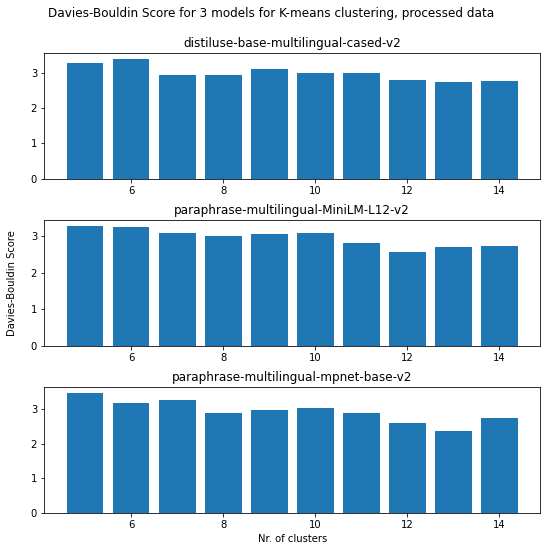

In [44]:
import matplotlib.pyplot as plt
import numpy as np

"""
Visualize the various metrics for the various models for K-means clustering.
Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'. 
"""

# Plot grid
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

num_clusters = [x for x in range (min_clusters, max_clusters)]
# Subplots - change arguments here for every score
ax1.bar(num_clusters, proc_distil_davies_scores)
ax2.bar(num_clusters, proc_para_mini_davies_scores)
ax3.bar(num_clusters, proc_para_base_davies_scores)
#ax1.set(xlim=(min_clusters, max_clusters), xticks=np.arange(min_clusters-1, max_clusters+1),
#       ylim=(0, 4), yticks=np.arange(0, 4, 1))
#ax2.set(xlim=(min_clusters, max_clusters), xticks=np.arange(min_clusters-1, max_clusters+1),
#       ylim=(0, 4), yticks=np.arange(0, 4, 1))
#ax3.set(xlim=(min_clusters, max_clusters), xticks=np.arange(min_clusters-1, max_clusters+1),
#       ylim=(0, 4), yticks=np.arange(0, 4, 1))

# Set the suptitle and common labels - change here for every score
fig.suptitle('Davies-Bouldin Score for 3 models for K-means clustering, processed data')
ax.set_xlabel('Nr. of clusters')
ax.set_ylabel('Davies-Bouldin Score')

# Set the subplot titles
ax1.set_title('distiluse-base-multilingual-cased-v2')
ax2.set_title('paraphrase-multilingual-MiniLM-L12-v2')
ax3.set_title('paraphrase-multilingual-mpnet-base-v2')

# Adjust sizes of subplots automatically
plt.tight_layout()

# Adjust the suptitle overlap
plt.subplots_adjust(top=0.9)

# Save and plot - change here for every score
plt.savefig('kmeans-davies-proc.png', dpi=300)
plt.show()


The three metrics used give inconclusive results in terms of the optimal number of clusters, but they do seem to indicate that the 'paraphrase-multilingual-MiniLM-L12-v2' model has performed best on this particular data. To get a better sense of the clusters, we will therefore visualize them for this particular model. In order to do this, we need to perform PCA dimensionality reduction since the embeddings are high-dimensional vectors. If we reduce them to 3 dimensions, we will be able to visualize them in a 3-dimensional plot. 

In [45]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import csv

"""
PCA dimensionality reduction.
"""

# Fit PCA with 3 principal components
pca = PCA(n_components=3)
pca_comp_orig_distiluse = pca.fit_transform(orig_embeddings_distiluse_arr)
pca_comp_orig_para_mini = pca.fit_transform(orig_embeddings_para_mini_arr)
pca_comp_orig_para_base = pca.fit_transform(orig_embeddings_para_base_arr)

pca_comp_proc_distiluse = pca.fit_transform(proc_embeddings_distiluse_arr)
pca_comp_proc_para_mini = pca.fit_transform(proc_embeddings_para_mini_arr)
pca_comp_proc_para_base = pca.fit_transform(proc_embeddings_para_base_arr)


# Save the principal components into a dataframe
pca_df_orig_distiluse = pd.DataFrame(data=pca_comp_orig_distiluse)
pca_df_orig_distiluse.columns = ['P1-distiluse', 'P2-distiluse', 'P3-distiluse']
pca_df_orig_para_mini = pd.DataFrame(data=pca_comp_orig_para_mini)
pca_df_orig_para_mini.columns = ['P1-para-mini', 'P2-para-mini', 'P3-para-mini']
pca_df_orig_para_base = pd.DataFrame(data=pca_comp_orig_para_base)
pca_df_orig_para_base.columns = ['P1-para-base', 'P2-para-base', 'P3-para-base']

pca_df_proc_distiluse = pd.DataFrame(data=pca_comp_proc_distiluse)
pca_df_proc_distiluse.columns = ['P1-distiluse', 'P2-distiluse', 'P3-distiluse']
pca_df_proc_para_mini = pd.DataFrame(data=pca_comp_proc_para_mini)
pca_df_proc_para_mini.columns = ['P1-para-mini', 'P2-para-mini', 'P3-para-mini']
pca_df_proc_para_base = pd.DataFrame(data=pca_comp_proc_para_base)
pca_df_proc_para_base.columns = ['P1-para-base', 'P2-para-base', 'P3-para-base']


# Concatenate the principal components dataframe and the original dataframe
df_orig_1_distiluse_kmeans['P1-distiluse'] = pca_df_orig_distiluse['P1-distiluse']
df_orig_1_distiluse_kmeans['P2-distiluse'] = pca_df_orig_distiluse['P2-distiluse']
df_orig_1_distiluse_kmeans['P3-distiluse'] = pca_df_orig_distiluse['P3-distiluse']

df_orig_1_para_mini_kmeans['P1-para-mini'] = pca_df_orig_para_mini['P1-para-mini']
df_orig_1_para_mini_kmeans['P2-para-mini'] = pca_df_orig_para_mini['P2-para-mini']
df_orig_1_para_mini_kmeans['P3-para-mini'] = pca_df_orig_para_mini['P3-para-mini']

df_orig_1_para_base_kmeans['P1-para-base'] = pca_df_orig_para_base['P1-para-base']
df_orig_1_para_base_kmeans['P2-para-base'] = pca_df_orig_para_base['P2-para-base']
df_orig_1_para_base_kmeans['P3-para-base'] = pca_df_orig_para_base['P3-para-base']

df_proc_1_distiluse_kmeans['P1-distiluse'] = pca_df_proc_distiluse['P1-distiluse']
df_proc_1_distiluse_kmeans['P2-distiluse'] = pca_df_proc_distiluse['P2-distiluse']
df_proc_1_distiluse_kmeans['P3-distiluse'] = pca_df_proc_distiluse['P3-distiluse']

df_proc_1_para_mini_kmeans['P1-para-mini'] = pca_df_proc_para_mini['P1-para-mini']
df_proc_1_para_mini_kmeans['P2-para-mini'] = pca_df_proc_para_mini['P2-para-mini']
df_proc_1_para_mini_kmeans['P3-para-mini'] = pca_df_proc_para_mini['P3-para-mini']

df_proc_1_para_base_kmeans['P1-para-base'] = pca_df_proc_para_base['P1-para-base']
df_proc_1_para_base_kmeans['P2-para-base'] = pca_df_proc_para_base['P2-para-base']
df_proc_1_para_base_kmeans['P3-para-base'] = pca_df_proc_para_base['P3-para-base']

# Save the dataframes to csv files
df_orig_1_distiluse_kmeans.to_csv('df-orig-1-distiluse-kmeans-pca.csv', index=False)
df_orig_1_para_mini_kmeans.to_csv('df-orig-1-para-mini-kmeans-pca.csv', index=False)
df_orig_1_para_base_kmeans.to_csv('df-orig-1-para-base-kmeans-pca.csv', index=False)

df_proc_1_distiluse_kmeans.to_csv('df-proc-1-distiluse-kmeans-pca.csv', index=False)
df_proc_1_para_mini_kmeans.to_csv('df-proc-1-para-mini-kmeans-pca.csv', index=False)
df_proc_1_para_base_kmeans.to_csv('df-proc-1-para-base-kmeans-pca.csv', index=False)

Now we can plot the clusters, creating plots for different numbers of clusters. As it is hard to discern the clusters when there are many of them (and they are overlapping as much as they are in our case) we present plots for 5, 7 and 9 clusters, both for unprocessed and processed data. 

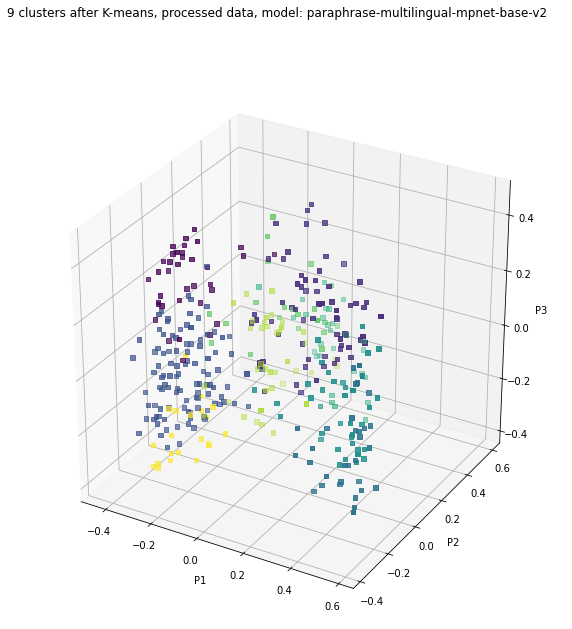

In [63]:
"""
Plotting the clusters for the following models:

'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'.
"""
# Plot the figure 
fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.add_subplot(111, projection='3d')
x = np.array(df_proc_1_para_base_kmeans['P1-para-base'])
y = np.array(df_proc_1_para_base_kmeans['P2-para-base'])
z = np.array(df_proc_1_para_base_kmeans['P3-para-base'])
ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')

fig.suptitle("9 clusters after K-means, processed data, model: paraphrase-multilingual-mpnet-base-v2")

# Change here, different nr. of clusters
ax.scatter(x,y,z, marker="s", c=df_proc_1_para_base_kmeans["para-base-k-means-9"], s=20, cmap="viridis")

# Save and plot - change here for different nr. of clusters
plt.savefig('proc-kmeans-para-base-clusters-9.png', dpi=300)
plt.show()
